#  <h1 style="text-align:center;">Assignment - 9</h1>

* Calculate Pi value using openMPI send and receive messages for atleast 35-40 terms.
* Change the value on n as 2, 4, 8, 16.
* Analyze the performance improvement using number of processes.

In [1]:
from mpi4py import MPI
import random
import matplotlib.pyplot as plt
import time

In [2]:
def calculate_pi(rank, num_processes, terms):
    partial_sum = 0.0
    for i in range(rank, terms, num_processes):
        if i % 2 == 0:
            partial_sum += 1.0 / (2 * i + 1)
        else:
            partial_sum -= 1.0 / (2 * i + 1)
    return partial_sum * 4

if __name__ == "__main__":
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()
    size = comm.Get_size()

    terms = 100000000

    start_time = time.time()

    partial_pi = calculate_pi(rank, size, terms)
    print(f"Process {rank} calculated: Pi = {partial_pi}, Time = {time.time() - start_time} seconds")

    if rank == 0:
        total_pi = partial_pi
        for i in range(1, size):
            partial_result, partial_time = comm.recv(source=i)
            total_pi += partial_result
            print(f"Process {i} received: Pi = {partial_result}, Time = {partial_time} seconds")

        print("Number of processes:", size)
        print("Estimated Pi:", total_pi)
        print("Execution time:", time.time() - start_time, "seconds")
    else:
        comm.send((partial_pi, time.time() - start_time), dest=0)

Process 0 calculated: Pi = 3.141592643589326, Time = 45.04786658287048 seconds
Number of processes: 1
Estimated Pi: 3.141592643589326
Execution time: 45.04786658287048 seconds


In [3]:
!mpiexec -n 2 python Calculate_Pi_value.py

Process 1 calculated: Pi = -18.813394448175345, Time = 15.578516483306885 seconds
Process 0 calculated: Pi = 21.954987091759833, Time = 16.12114691734314 seconds
Process 1 received: Pi = -18.813394448175345, Time = 15.578516483306885 seconds
Number of processes: 2
Estimated Pi: 3.141592643584488
Execution time: 16.13143539428711 seconds


In [4]:
!mpiexec -n 4 python Calculate_Pi_value.py

Process 1 calculated: Pi = -9.894192713487952, Time = 7.745937824249268 seconds
Process 3 calculated: Pi = -8.919201734688878, Time = 8.286001443862915 seconds
Process 2 calculated: Pi = 9.243547576205538, Time = 8.427385330200195 seconds
Process 0 calculated: Pi = 12.711439515567903, Time = 7.98891019821167 seconds
Process 1 received: Pi = -9.894192713487952, Time = 7.745937824249268 seconds
Process 2 received: Pi = 9.243547576205538, Time = 8.427385330200195 seconds
Process 3 received: Pi = -8.919201734688878, Time = 8.286001443862915 seconds
Number of processes: 4
Estimated Pi: 3.1415926435966117
Execution time: 8.424819946289062 seconds


In [5]:
!mpiexec -n 8 python Calculate_Pi_value.py

Process 7 calculated: Pi = -4.256559977941305, Time = 5.042468786239624 seconds
Process 5 calculated: Pi = -4.399299923327154, Time = 5.090317964553833 seconds
Process 6 calculated: Pi = 4.319461385334904, Time = 6.456605434417725 seconds
Process 1 calculated: Pi = -5.494892790161891, Time = 6.5808985233306885 seconds
Process 4 calculated: Pi = 4.5064163512322155, Time = 6.639330863952637 seconds
Process 3 calculated: Pi = -4.662641756747161, Time = 6.6474997997283936 seconds
Process 2 calculated: Pi = 4.924086190869872, Time = 6.733549118041992 seconds
Process 0 calculated: Pi = 8.205023164331104, Time = 6.762158155441284 seconds
Process 1 received: Pi = -5.494892790161891, Time = 6.5808985233306885 seconds
Process 2 received: Pi = 4.924086190869872, Time = 6.733549118041992 seconds
Process 3 received: Pi = -4.662641756747161, Time = 6.6474997997283936 seconds
Process 4 received: Pi = 4.5064163512322155, Time = 6.639330863952637 seconds
Process 5 received: Pi = -4.399299923327154, Tim

In [6]:
!mpiexec -n 16 python Calculate_Pi_value.py

Process 5 calculated: Pi = -2.334733085800057, Time = 2.950575113296509 seconds
Process 14 calculated: Pi = 2.048883162920837, Time = 3.011434316635132 seconds
Process 9 calculated: Pi = -2.1514542620738304, Time = 2.9923923015594482 seconds
Process 1 calculated: Pi = -3.343438528087643, Time = 4.54207181930542 seconds
Process 11 calculated: Pi = -2.102010079259159, Time = 4.207803964614868 seconds
Process 4 calculated: Pi = 2.4242898780367725, Time = 3.8869941234588623 seconds
Process 3 calculated: Pi = -2.5606316774894724, Time = 4.130717992782593 seconds
Process 10 calculated: Pi = 2.1248310598041242, Time = 5.66577935218811 seconds
Process 13 calculated: Pi = -2.064566837527382, Time = 5.360623121261597 seconds
Process 7 calculated: Pi = -2.221819992321798, Time = 5.874985933303833 seconds
Process 8 calculated: Pi = 2.1831425099178574, Time = 5.779357671737671 seconds
Process 15 calculated: Pi = -2.0347399856201327, Time = 5.342623949050903 seconds
Process 6 calculated: Pi = 2.2705

In [8]:
num_processes = [1,2, 4, 8, 16]
execution_times = [45.04786658287048, 16.13143539428711, 8.424819946289062, 6.762705564498901,6.584681272506714]

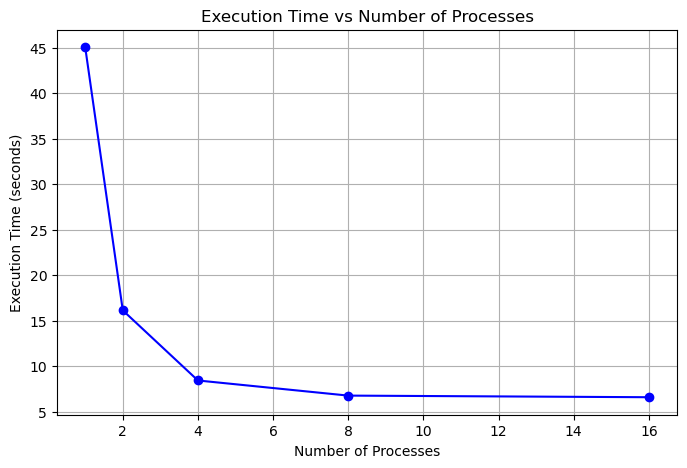

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(num_processes, execution_times, marker='o', color='blue')
plt.title('Execution Time vs Number of Processes')
plt.xlabel('Number of Processes')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()